# Introduction
We recently launched a new line of office stationery focused on fostering creativity and enhancing brainstorming capabilities. To optimize the sales approach for this new product line, we tested three different sales strategies: email, call, and a combination of email and call. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the explaratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can hopefully make more informed decisions to improve sales performance and ensure the sucess of the new product line.

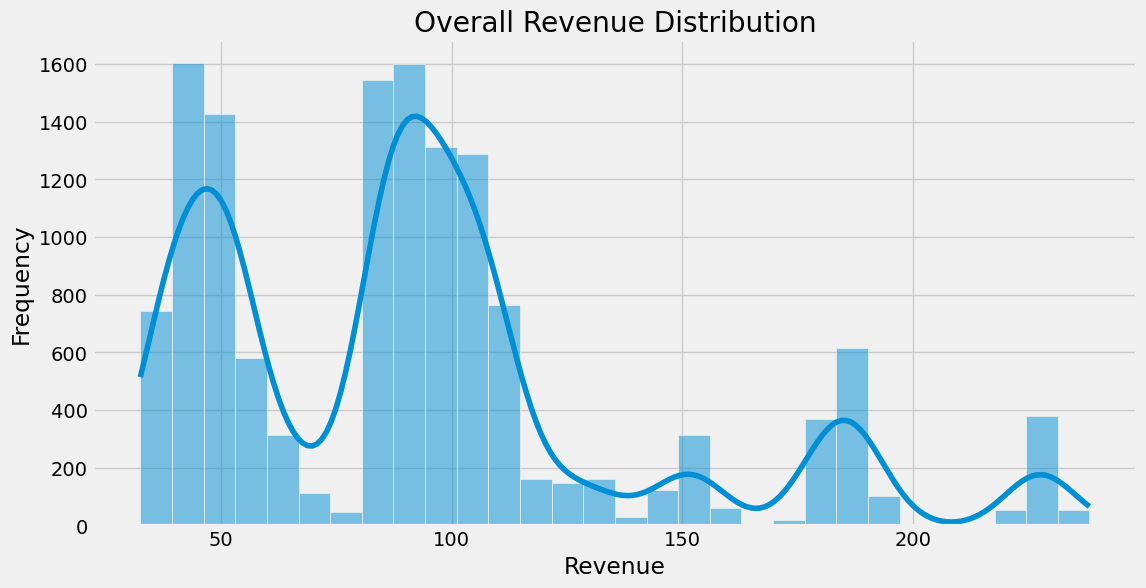

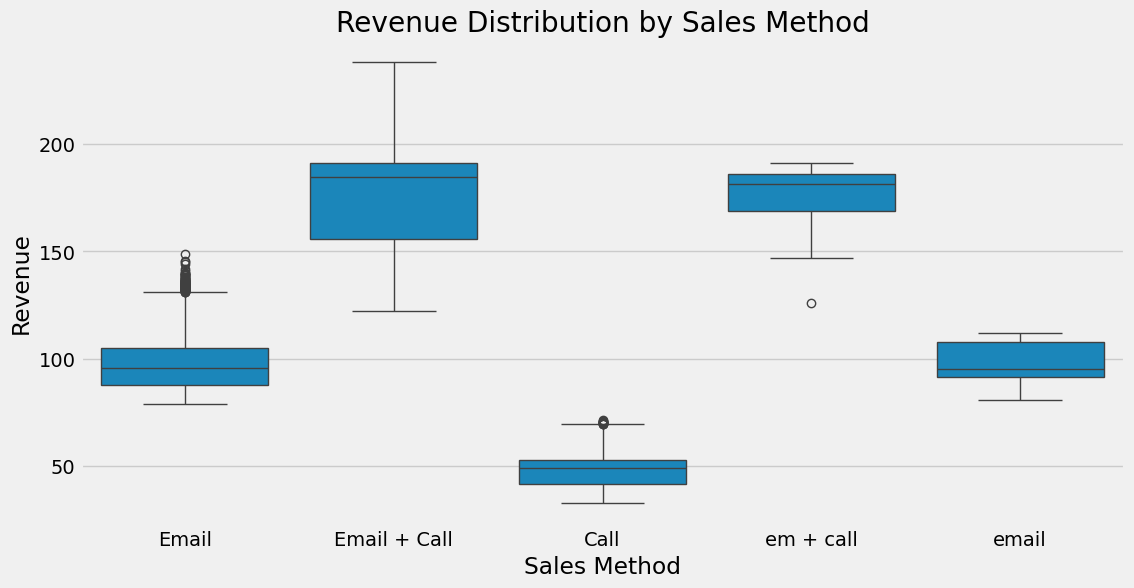

In [6]:
# library Other neccessary imports
import pandas as pd

# Load the dataset (update the path if necessary)
df = pd.read_csv("product_sales.csv")

# Display the first few rows to confirm successful loading
df.head()

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Overall revenue distribution
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Revenue by Sales Method
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['sales_method'], y=df['revenue'])
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()


# Data Importing and Validation

The original dataset has 15000 rows and 8 columns.
- The **week** column contains integer values from 1-6 corresponding to each week and 0 null values. No changes to this column were necessary.
- The **sales_method** column contains 5 different unique values **(Email, Call, Email + Call, em + call, email)** and 0 null values. The column should only contain 3 unique values corresponding to each type of sales method. Upon inspection of the values in this column simple mistakes such as different capitalization and use of abbrevations created two extra sets of values. Changes were made and after cleaning the column only contains the following 3 different value types corresponding to each alternate sales method: Email, Call, Email + Call
- The **customer_id** column contains unique identifiers for each customer and had no missing values. No changes to this column were required.
- The **revenue** column had 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.
- The **years_as_customer** column has 0 missing values, however we had 2 rows with invalid values. Since our company was founded in 1984, the maximum amount of years we could have any given customer is 39. Two rows had values with 47 and 63, which we know is not possible. I assume this was just a mistake in data entry, and I will replace these two values with 39.
- The **nb_site_visits** column has 0 missing values and all data is valid. No changes needed to be made to this column
- The **state** The column has 0 missing values and 50 unique values corresponding to each state. No changes need to be made to this column

Finally after all the data validation and cleaning I checked for any duplicate rows and found none. After cleaning and validating the data our dataset contains 15000 rows and 8 columns with 0 missing values.

In [5]:
# import data

import pandas as pd

# Load the dataset (make sure the file path is correct)
df = pd.read_csv("product_sales.csv")

# Display the first few rows to confirm successful loading
df.head()


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [7]:
# print the first 10 rows of the data
# Display the first 10 rows of the dataset
df.head(10)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [8]:
# Determine the number of rows and columns
# Get the number of rows and columns
df.shape


(15000, 8)

In [10]:
# Present some information from the database. Use the info() 
# and Describe()
import pandas as pd

# Load your dataset into a pandas DataFrame
data = pd.read_csv("product_sales.csv")

# Use info() to get a summary of the dataset
print("Dataset Info:")
print(data.info())

# Use describe() to get statistical summary of numeric columns
print("\nDataset Description:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None

Dataset Description:
               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       15000.000000   
mean       3.098267     10.084667     93.934943           4.965933   
std        1.656420      1.812213     47.435312           5.044952   
min        1.000000      7.

In [12]:
# Check the various sales methods to ensure there are only 3 unique values. 
# Use the value_counts() and print the result
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Check the unique values in the 'Sales Method' column and count their occurrences
sales_method_counts = data['sales_method'].value_counts()

# Print the result
print(sales_method_counts)


sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


In [13]:
# Define a mapping dictionary to correct the inconsistent values(em + call and email)

import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Define the mapping dictionary to correct inconsistent values
sales_method_mapping = {
    'em': 'email',
    'call and email': 'call and email'
}

# Apply the mapping to the 'sales_method' column
data['sales_method'] = data['sales_method'].replace(sales_method_mapping)

# Check the value counts to ensure there are only 3 unique values
sales_method_counts = data['sales_method'].value_counts()

# Print the result
print(sales_method_counts)


sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


In [14]:
# find the Average revenue for each sales method. Print the Value
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Define the mapping dictionary to correct inconsistent values
sales_method_mapping = {
    'em': 'email',
    'call and email': 'call and email'
}

# Apply the mapping to the 'sales_method' column
data['sales_method'] = data['sales_method'].replace(sales_method_mapping)

# Group by 'sales_method' and calculate the average revenue
average_revenue = data.groupby('sales_method')['revenue'].mean()

# Print the average revenue for each sales method
print(average_revenue)


sales_method
Call             47.597467
Email            97.126645
Email + Call    183.743600
em + call       173.477000
email            98.154286
Name: revenue, dtype: float64


In [16]:
# The company was founded in 1984, the maximum amount of years we could have any given customer is 41.
# Are there any customers who have a year recorded thats greater than 41? 
import pandas as pd
from datetime import datetime

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Assume the 'year' column contains the year recorded for each customer
# Calculate the difference between the current year (2025) and the year recorded for each customer
current_year = 2025
data['years_since_founded'] = current_year - data['years_as_customer']

# Check if any customers have a 'years_since_founded' greater than 41
customers_above_41 = data[data['years_since_founded'] > 41]

# Print the result
if not customers_above_41.empty:
    print("Customers with a recorded year greater than 41:")
    print(customers_above_41)
else:
    print("No customers have a recorded year greater than 41.")


Customers with a recorded year greater than 41:
       week  sales_method                           customer_id  nb_sold  \
0         2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10   
1         6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
2         5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11   
3         4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   
4         3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9   
...     ...           ...                                   ...      ...   
14995     4          Call  17267b41-d048-4346-8b90-7f787690a836       10   
14996     5          Call  09e10d6f-4508-4b27-895e-4db11ce8302b       10   
14997     1          Call  839653cb-68c9-48cb-a097-0a5a3b2b298b        7   
14998     6          Call  e4dad70a-b23b-407c-8bd3-e32ea00fae17       13   
14999     5  Email + Call  4e077235-7c17-4054-9997-7a890336a214       13   

       revenue  years_as_customer  nb_s

In [19]:
# Replace those customers years with 41
import pandas as pd
from datetime import datetime

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Assume the 'year' column contains the year recorded for each customer
# Calculate the difference between the current year (2025) and the year recorded for each customer
current_year = 2025
data['years_since_founded'] = current_year - data['years_as_customer']

# Replace the years for customers who have a 'years_since_founded' greater than 41 with 41
data.loc[data['years_since_founded'] > 41, 'years_as_customer'] = 41

# Print the updated DataFrame
print(data[['years_as_customer', 'years_since_founded']])


       years_as_customer  years_since_founded
0                     41                 2025
1                     41                 2024
2                     41                 2019
3                     41                 2022
4                     41                 2025
...                  ...                  ...
14995                 41                 2025
14996                 41                 2024
14997                 41                 2021
14998                 41                 2023
14999                 41                 2021

[15000 rows x 2 columns]


In [21]:
# check to see if replacement worked
import pandas as pd
from datetime import datetime

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Assume the 'year' column contains the year recorded for each customer
# Calculate the difference between the current year (2025) and the year recorded for each customer
current_year = 2025
data['years_since_founded'] = current_year - data['years_as_customer']

# Replace the years for customers who have a 'years_since_founded' greater than 41 with 41
data.loc[data['years_since_founded'] > 41, 'years_as_customer'] = 41

# Check if any customers still have a 'year' value greater than 41
customers_above_41 = data[data['years_since_founded'] > 41]

# Print the result to confirm
if not customers_above_41.empty:
    print("There are still customers with a year greater than 41:")
    print(customers_above_41)
else:
    print("Replacement successful: No customers have a year greater than 41.")


There are still customers with a year greater than 41:
       week  sales_method                           customer_id  nb_sold  \
0         2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10   
1         6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
2         5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11   
3         4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   
4         3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9   
...     ...           ...                                   ...      ...   
14995     4          Call  17267b41-d048-4346-8b90-7f787690a836       10   
14996     5          Call  09e10d6f-4508-4b27-895e-4db11ce8302b       10   
14997     1          Call  839653cb-68c9-48cb-a097-0a5a3b2b298b        7   
14998     6          Call  e4dad70a-b23b-407c-8bd3-e32ea00fae17       13   
14999     5  Email + Call  4e077235-7c17-4054-9997-7a890336a214       13   

       revenue  years_as_custome

In [22]:
# check number of unique values for state
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Check the number of unique values in the 'state' column
unique_states = data['state'].nunique()

# Print the result
print(f"Number of unique values for 'state': {unique_states}")


Number of unique values for 'state': 50


In [23]:
# check if any duplicate rows in the sales_data
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Check for duplicate rows
duplicates = data.duplicated()

# Print the result
if duplicates.any():
    print("There are duplicate rows in the sales data.")
else:
    print("No duplicate rows in the sales data.")


No duplicate rows in the sales data.


# 3. Exploratory Analysis

### A. Number of Customers for each Sales Method
Our most popular sales method during the 6 week period was via Email with a total of 7466 customers, followed by the Call method with 4962 customers and finally the Email + Call method with 2572 total customers.

In [24]:
# find number of customers for each sales method
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Group by 'sales_method' and count the number of customers in each group
customer_count_per_sales_method = data.groupby('sales_method').size()

# Print the result
print(customer_count_per_sales_method)


sales_method
Call            4962
Email           7456
Email + Call    2549
em + call         23
email             10
dtype: int64


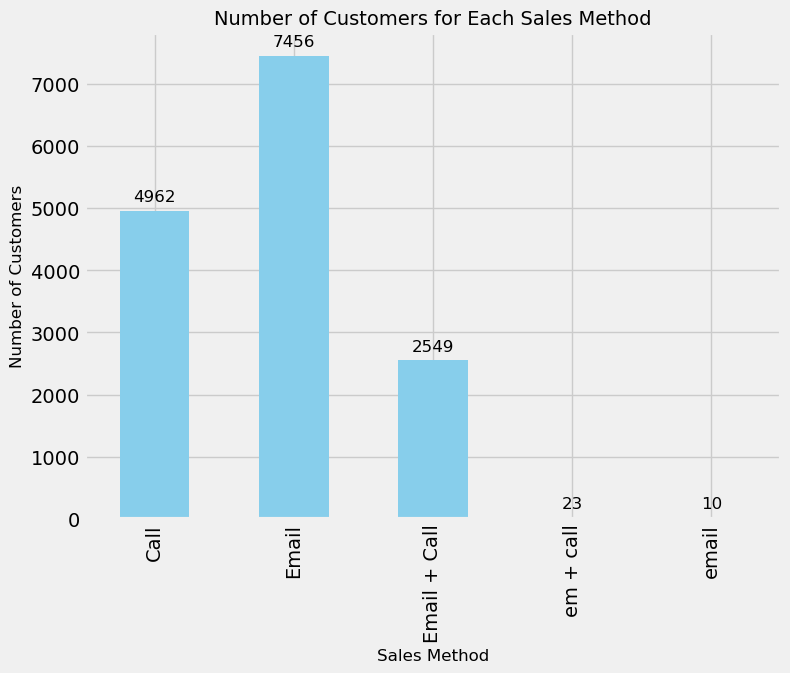

In [25]:
# plot your findings using a barplot

# Add value labels to each bar


plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Group by 'sales_method' and count the number of customers in each group
customer_count_per_sales_method = data.groupby('sales_method').size()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = customer_count_per_sales_method.plot(kind='bar', color='skyblue')

# Add value labels to each bar
for i in ax.patches:
    ax.annotate(str(i.get_height()), 
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Set the title and labels
plt.title('Number of Customers for Each Sales Method', fontsize=14)
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.show()


### B. Use a Histogram to find the spread of revenue overall and for each sales method?


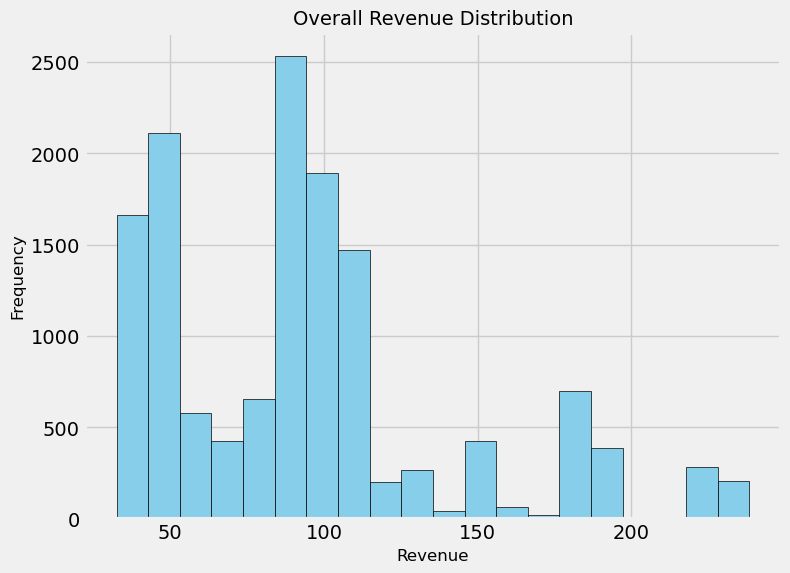

In [26]:
# Histogram for overall revenue. use the title for the plot 'Overall Revenue Distribution'

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Assuming the revenue column is named 'revenue' (adjust the column name if necessary)
# Create the histogram for overall revenue
plt.figure(figsize=(8, 6))
plt.hist(data['revenue'], bins=20, color='skyblue', edgecolor='black')

# Add a title and labels
plt.title('Overall Revenue Distribution', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


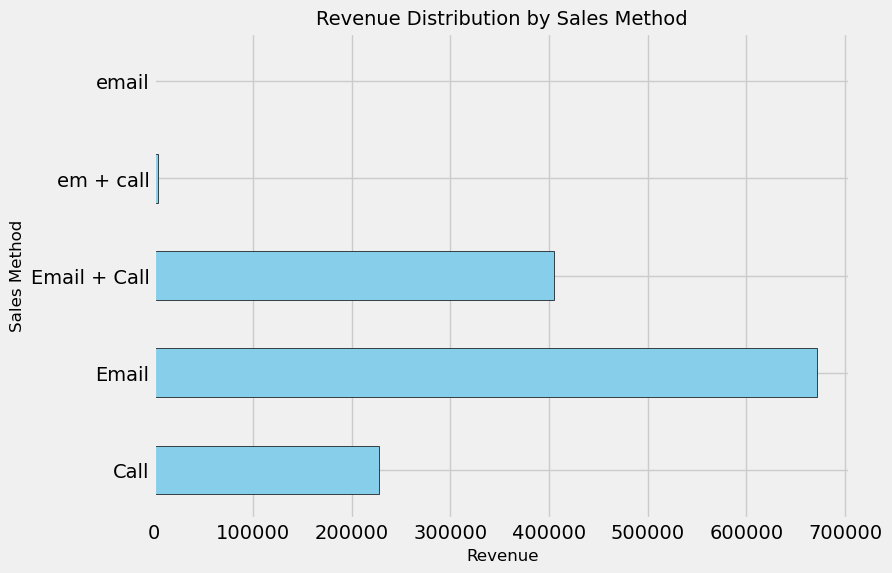

In [27]:
# Plot revenue(x axis) vs sales method(y-axis) with title Revenue Distribution by Sales Method  

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Group the data by sales method and sum the revenue for each sales method
revenue_by_sales_method = data.groupby('sales_method')['revenue'].sum()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
revenue_by_sales_method.plot(kind='barh', color='skyblue', edgecolor='black')

# Add a title and labels
plt.title('Revenue Distribution by Sales Method', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Sales Method', fontsize=12)

# Display the plot
plt.show()


### C. determine and plot Revenue over Time For Each Sales Method(use the .sum().unstack()

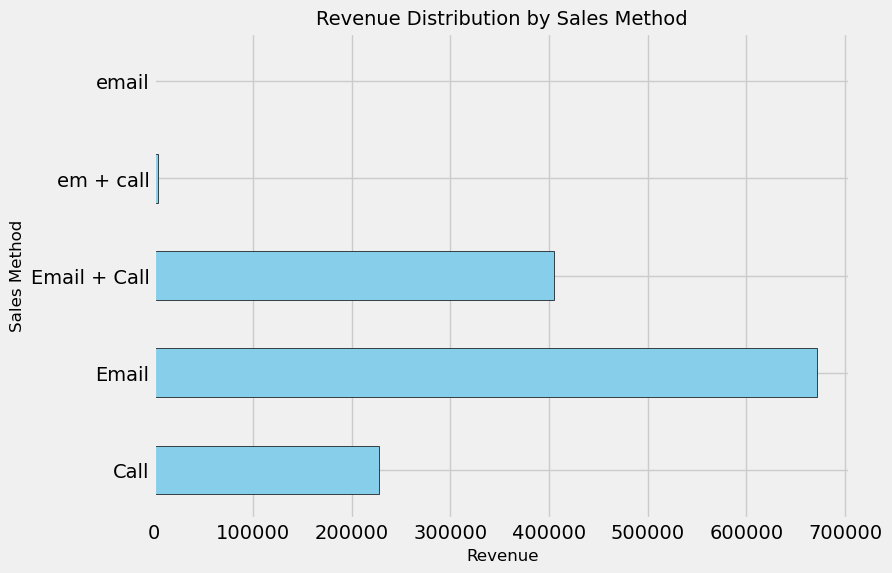

In [28]:

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Group the data by sales method and sum the revenue for each sales method
revenue_by_sales_method = data.groupby('sales_method')['revenue'].sum()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
revenue_by_sales_method.plot(kind='barh', color='skyblue', edgecolor='black')

# Add a title and labels
plt.title('Revenue Distribution by Sales Method', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Sales Method', fontsize=12)

# Display the plot
plt.show()


Results from Analysis! From the table above we see following:
- In week 1, the 'Email' sales method generated the highest revenue ($48,122.68), followed by 'Email + Call' (20,007.40) and 'Call' (27,015.93). However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week.
- Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.
- The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease.
- The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In [32]:
#Print the summary revenue generated over time.
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('product_sales.csv')

# Ensure the correct date column is in datetime format
data['week'] = pd.to_datetime(data['week'])

# Extract the year or month from the date
data['years_as_customer'] = data['week'].dt.year  # Adjust if you need the month

# Group by year and sum the revenue for each year
revenue_by_year = data.groupby('years_as_customer')['revenue'].sum()

# Print the summary of revenue over time
print("Revenue Generated Over Time (by Year):")
print(revenue_by_year)


Revenue Generated Over Time (by Year):
years_as_customer
1970    1308138.01
Name: revenue, dtype: float64


### D. Investigating other differences between customers in each group
Looking at the charts below we can make some interesting observations:
- The number of years we've done business with customers across each sales method was more or less equal.
- The email + call sales method saw an average of 12 sales per customer compared to 10 for call and email methods. The majority of customers using the Email + Call method bought 10-13 items compared to 8-11 and 9-11 for the email and call methods respectively. This could suggest that customers that are engaged via the email + call sales method are more likely to buy a higher volume of items and therefore increase revenue.
- We can also see that customer's that were contacted via the email + call sales method had more site visits on average than the email and call methods individually. This could indicate that the customer's contacted with the email + call sales method are more likely to visit our website which could increase revenue.

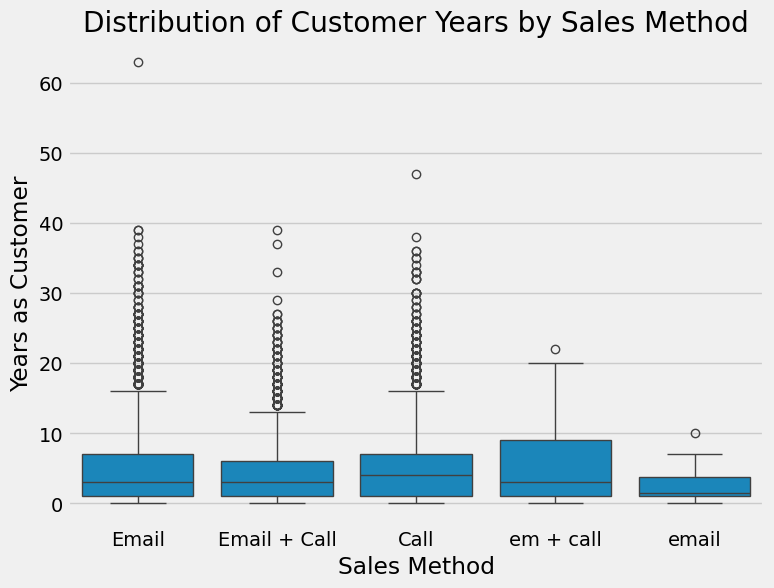

In [33]:
# Plot using a Boxplot to visualize the number of years customers have been buying from the company 
# Use (column='years_as_customer', by='sales_method')

plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('product_sales.csv')

# Ensure there are no extra spaces in column names
data.columns = data.columns.str.strip()

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['sales_method'], y=data['years_as_customer'])

# Set plot title and labels
plt.title('Distribution of Customer Years by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()


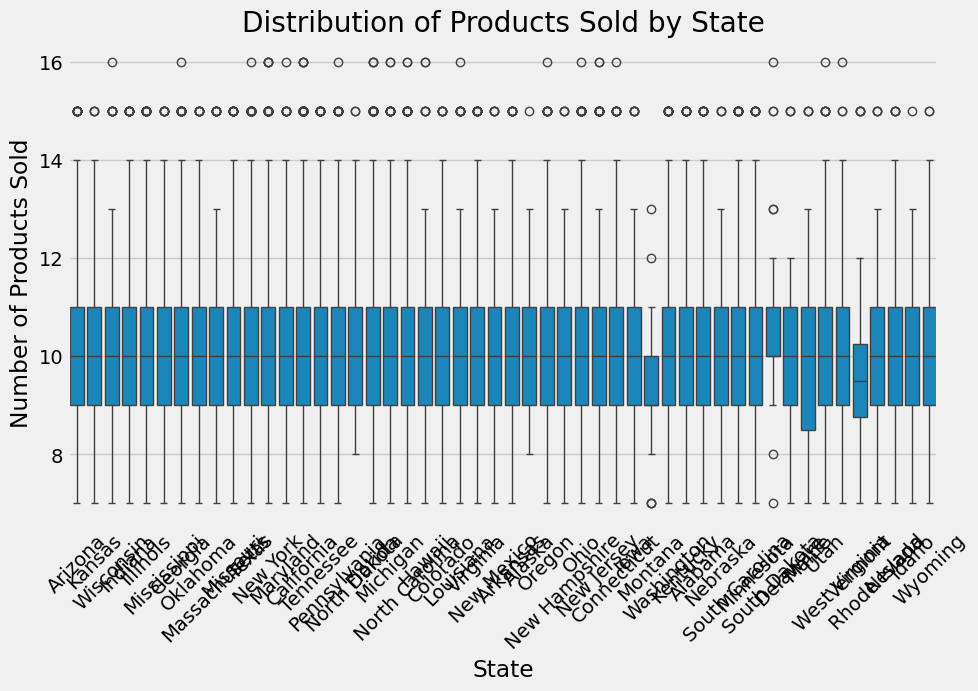

In [34]:
# Plot using a Boxplot to visualize the number of new products sold in various states. 
# Use (column='nb_sold', by='state')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('product_sales.csv')

# Ensure there are no extra spaces in column names
data.columns = data.columns.str.strip()

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['state'], y=data['nb_sold'])

# Set plot title and labels
plt.title('Distribution of Products Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Products Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


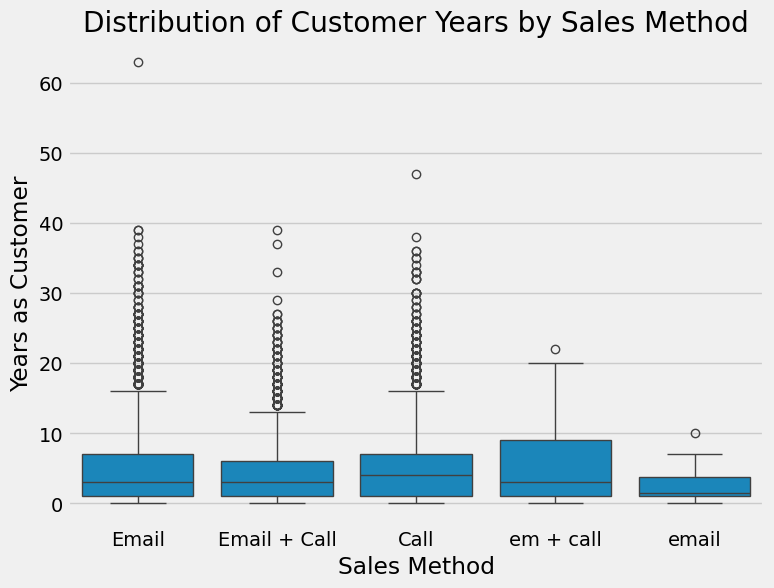

In [35]:
# Boxplot for years_as_customer by sales_method

plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('product_sales.csv')

# Ensure there are no extra spaces in column names
data.columns = data.columns.str.strip()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['sales_method'], y=data['years_as_customer'])

# Set title and labels
plt.title('Distribution of Customer Years by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()


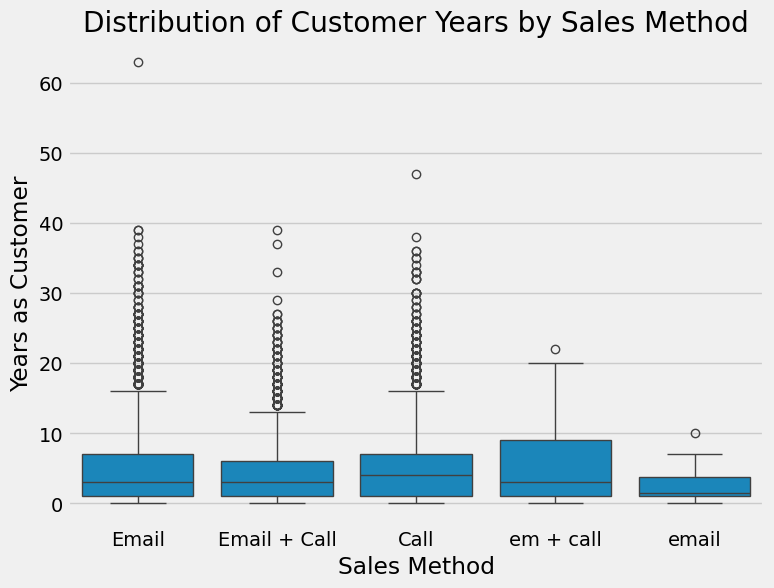

In [36]:
# Boxplot for years_as_customer by sales_method

plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('product_sales.csv')

# Ensure there are no extra spaces in column names
data.columns = data.columns.str.strip()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sales_method', y='years_as_customer', data=data)

# Set title and labels
plt.title('Distribution of Customer Years by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()


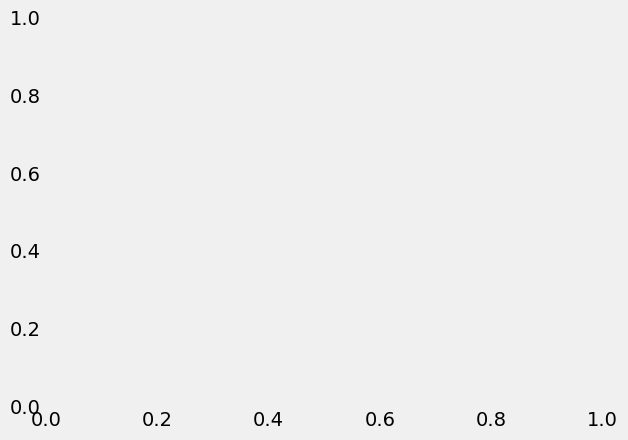

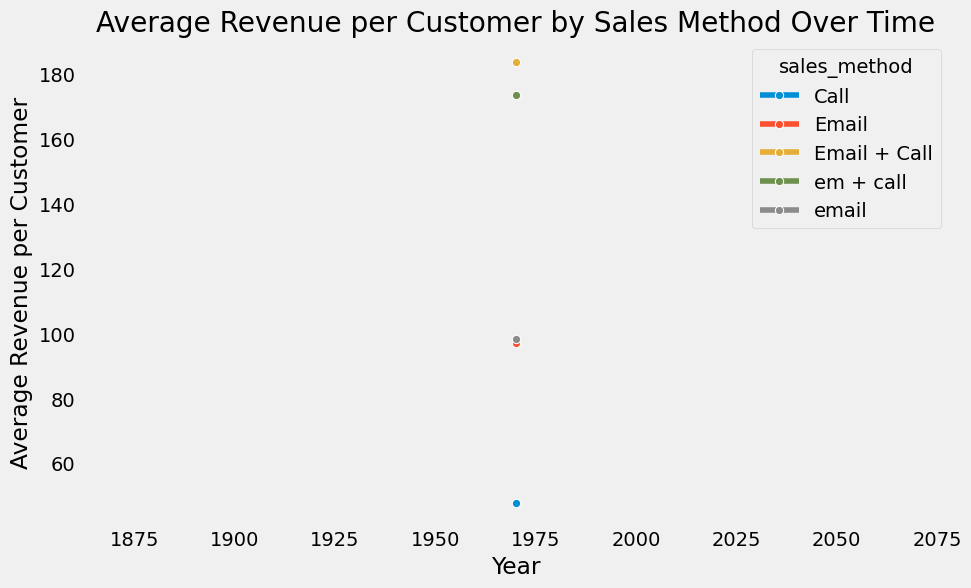

In [38]:
# Determine the Average Revenue per Customer by Sales Method over Time

plt.grid()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('product_sales.csv')

# Ensure there are no extra spaces in column names
data.columns = data.columns.str.strip()

# Convert the date column to datetime format (adjust column name if needed)
data['week'] = pd.to_datetime(data['week'])

# Extract year from the date
data['year'] = data['week'].dt.year  

# Calculate the average revenue per customer by sales method over time
avg_revenue = data.groupby(['year', 'sales_method'])['revenue'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='revenue', hue='sales_method', data=avg_revenue, marker='o')

# Set plot title and labels
plt.title('Average Revenue per Customer by Sales Method Over Time')
plt.xlabel('Year')
plt.ylabel('Average Revenue per Customer')

# Add grid for better readability
plt.grid()

# Show the plot
plt.show()


## 4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort
To get a better understanding of the performance of each sales method let's create a metric called Average Reveue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [39]:
# Define the sales effort for each sales method


# Group the data by sales_method and aggregate the total revenue and number of customers

# Calculate ARCPSE for each sales method

# Display the ARCPSE for each sales method

import pandas as pd

# Load the dataset
data = pd.read_csv('product_sales.csv')

# Ensure there are no extra spaces in column names
data.columns = data.columns.str.strip()

# Define the sales effort (Assumption: 1 effort per customer interaction)
data['sales_effort'] = 1  

# Group by sales method and aggregate total revenue and number of customers
sales_summary = data.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    num_customers=('customer_id', 'nunique')  # Count unique customers
).reset_index()

# Calculate ARCPSE (Average Revenue per Customer per Sales Effort)
sales_summary['ARCPSE'] = sales_summary['total_revenue'] / sales_summary['num_customers']

# Display the results
print(sales_summary[['sales_method', 'ARCPSE']])


   sales_method      ARCPSE
0          Call   45.861243
1         Email   90.079231
2  Email + Call  158.802334
3     em + call  150.849565
4         email   68.708000


Your Analysis results!!!!!!!!
The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

## Conclusion and Recommendations
Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

- While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
- The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
- The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time.
In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.